In [1]:
%matplotlib widget
import ibvpy.api as ib
import matplotlib.pylab as plt
from matplotlib import cm
from scipy.interpolate import interp2d
from scipy.signal import argrelextrema
from bmcs_shear.api import CrackBridgeAdv
from bmcs_shear.dic_crack import\
    DICGrid, DICStateFields, DICCrackList, DICCrack, DICCrackCOR, DICAlignedGrid
from bmcs_shear.shear_crack.crack_path import get_T_Lab
import numpy as np
import ibvpy.api as ib
np.seterr(divide ='ignore', invalid='ignore');

In [2]:
from bmcs_shear.dic_crack import DICStressProfile
dic_grid = DICGrid(U_factor=100, dir_name='B1_TV1', t=1)
#dic_grid = DICGrid(start_t=0, end_t=1, U_factor=100, dir_name='B9_TV1', t=1)
dsf = DICStateFields(dic_grid=dic_grid)
l_cb = dic_grid.d_x * 1
dsf.tmodel_.trait_set(E=5000, c_T=0, nu=0.18, epsilon_0=0.0005, epsilon_f=0.02/l_cb, eps_max=0.005);
dsf.eval()

dcl = DICCrackList(dsf=dsf)
crack_s = dcl.items[0]
crack_s.cl.dsf
dc_cor = DICCrackCOR(dic_crack = crack_s)


sp = DICStressProfile(dic_crack = crack_s)

Creating cracks


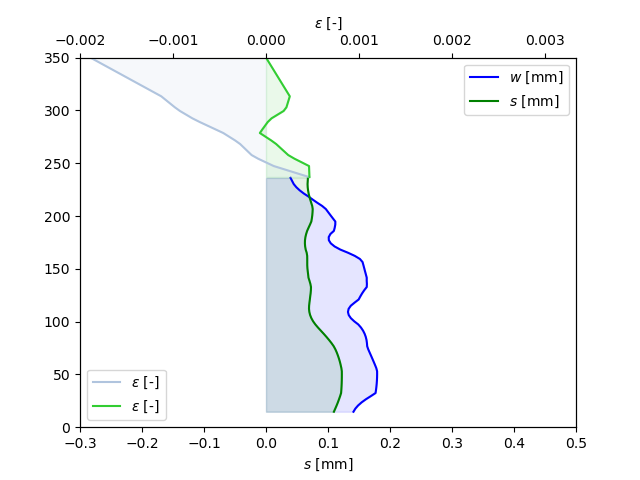

In [4]:
import bmcs_utils.api as bu
fig, ax = plt.subplots()
crack_s.plot_u_t_crc_Kb(ax)
x1, x2 = ax.get_xlim()
ax2=ax.twiny()
crack_s.plot_eps_t_Kab(ax2)
ax2.set_xlim([-0.0020,0.0020])
ax.set_xlim([-0.1,0.5])
plt.ylim([0, 350])
bu.mpl_align_xaxis(ax, ax2)
plt.show()

In [ ]:
import bmcs_utils.api as bu
crack_s.cor.trait_set(step_N_COR=2)
fig, ax = plt.subplots()
crack_5.plot_x_1_Ka(ax)
crack_5.cor.plot_VW_rot_t(ax)
crack_5.cor.plot_X_cor_rot_t(ax)